In [1]:
!pip install ipympl

In [2]:
%matplotlib widget

In [ ]:
# You need these lines in Google Colab

#from google.colab import output
#output.enable_custom_widget_manager()

In [5]:


import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML, Image

plt.rcParams['text.usetex'] = False

In [39]:
def solve_task1(scale=1, gif=True):
    fig, ax = plt.subplots()
    ax.set_aspect("equal")
    xdata, ydata = [], []
    ln, = plt.plot([], [], 'b-')
    vecs = []
    caps = []

    def xt(t):
        return 3 * t

    def yt(t):
        return 4 * t**2 + 1

    def yx(x):
        return 4 / 9 * x**2 + 1

    def vt(t):
        return (3, 8 * t)

    def at(t):
        return (0, 8)

    def att(t):
        return np.dot(vt(t), at(t)) / np.sqrt(np.dot(vt(t), vt(t)))

    def ant(t):
        return np.sqrt(np.dot(at(t), at(t)) - att(t)**2)

    def init_yx():
        ax.set_xlim(scale * -50, scale * 50)
        ax.set_ylim(scale * -1, scale * 105)
        plt.xlabel('x')
        plt.ylabel('y(x)')
        plt.grid()
        plt.autoscale(False)
        plt.title('Original Size')
        return ln,

    def update_yx(frame):

        xdata.append(xt(frame))
        ydata.append(yx(xt(frame)))

        while len(vecs):
            vecs[-1].remove()
            vecs.pop()

        while len(caps):
            caps[-1].remove()
            caps.pop()

        scale_factor = 1

        xt_val = xt(frame)
        yt_val = yt(frame)
        yx_val = yx(xt_val)
        att_val = att(frame)
        ant_val = ant(frame)

        vt_vec = vt(frame)
        tan_vec = vt_vec / np.sqrt(np.dot(vt_vec, vt_vec))
        norm_vec_c = complex(tan_vec[0], tan_vec[1]) * np.exp(np.pi / 2 * complex(0, 1))
        norm_vec = np.array([norm_vec_c.real, norm_vec_c.imag])

        at_vec = scale_factor * at(frame)
        att_vec = scale_factor * att_val * tan_vec   
        ant_vec = scale_factor * ant_val * norm_vec

        vecs.append(plt.quiver([xt_val], [yx_val], [vt_vec[0]], [vt_vec[1]], units='xy', scale = 1, scale_units='xy', angles='xy'))
        vecs.append(plt.quiver([xt_val], [yx_val], [at_vec[0]], [at_vec[1]], units='xy', scale = 1, scale_units='xy', angles='xy', color='g'))
        vecs.append(plt.quiver([xt_val], [yx_val], [att_vec[0]], [att_vec[1]], units='xy', scale = 1, scale_units='xy', angles='xy', color='r'))
        vecs.append(plt.quiver([xt_val], [yx_val], [ant_vec[0]], [ant_vec[1]], units='xy', scale = 1, scale_units='xy', angles='xy', color='b'))

        caps.append(ax.text(xt_val + at_vec[0], yx_val + at_vec[1], r'$\vec{a}$',  fontsize=10, color='green'))
        caps.append(ax.text(xt_val + att_vec[0], yx_val + att_vec[1], r'$\vec{a}_{\tau}$',  fontsize=10, color='red'))
        caps.append(ax.text(xt_val + vt_vec[0], yx_val + vt_vec[1], r'$\vec{v}$',  fontsize=10))
        caps.append(ax.text(xt_val + ant_vec[0], yx_val + ant_vec[1], r'$\vec{a}_{n}$',  fontsize=10, color='blue'))
        
        vecs[0].set_label(r'$[{:.2f}, {:.2f}]$ - vector of speed'.format(vt_vec[0], vt_vec[1]))
        vecs[1].set_label(r'$[{:.2f}, {:.2f}]$ - vector of tangential acceleration'.format(att_vec[0], att_vec[1]))
        vecs[2].set_label(r'$[{:.2f}, {:.2f}]$ - vector of normal acceleration'.format(ant_vec[0], ant_vec[1]))
        vecs[3].set_label(r'$[{:.2f}, {:.2f}]$ - vector of total acceleration'.format(at_vec[0], at_vec[1]))
        ax.legend()

        ln.set_data(xdata, ydata)
        return ln,

    ani = FuncAnimation(fig, update_yx, frames=np.linspace(-5, 5, 120),
                        init_func=init_yx, blit=True)


    if gif == True:
        ani.save('task1.gif', dpi=100, writer=PillowWriter(fps=60))
        plt.close('all')
    else:
        plt.show()

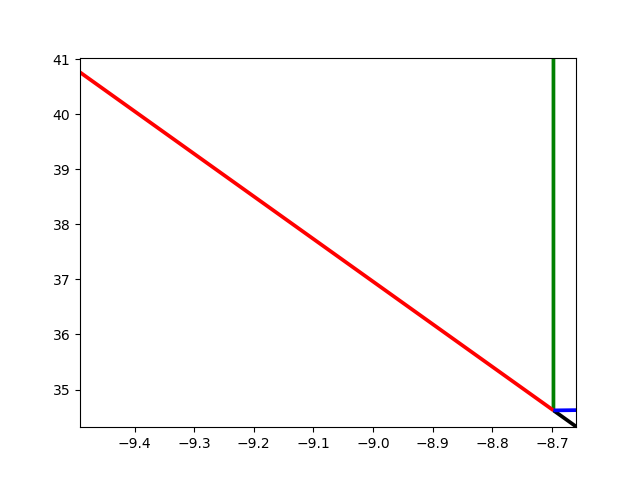

In [40]:
solve_task1(scale=1)